<a href="https://colab.research.google.com/github/sgeorge2012/ECGR4105/blob/main/Reg_Poly_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Model Performance Comparison:
                                   Model          RMSE           MAE  R2 Score
0                       Ridge Regression  19079.971149  15603.787167  0.907448
1  Polynomial Regression (deg=2) + Ridge   8984.164450   6649.328514  0.979480


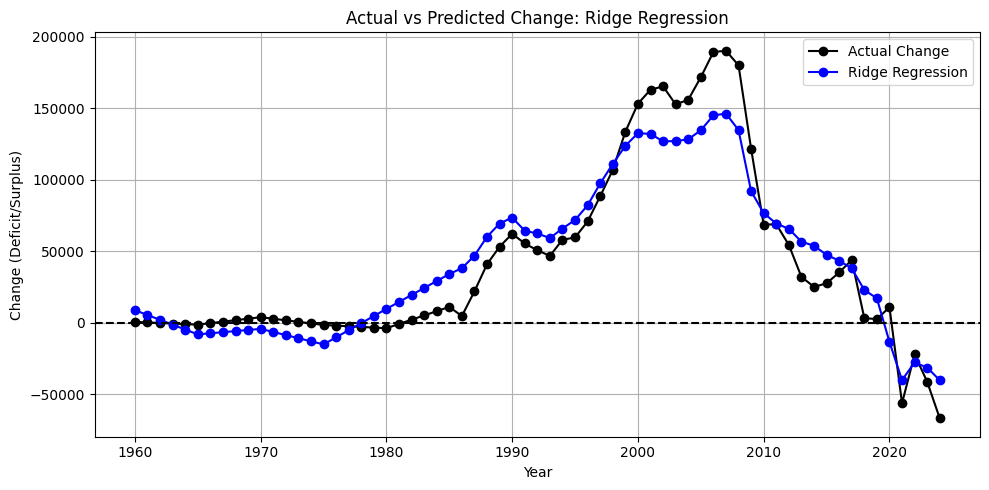

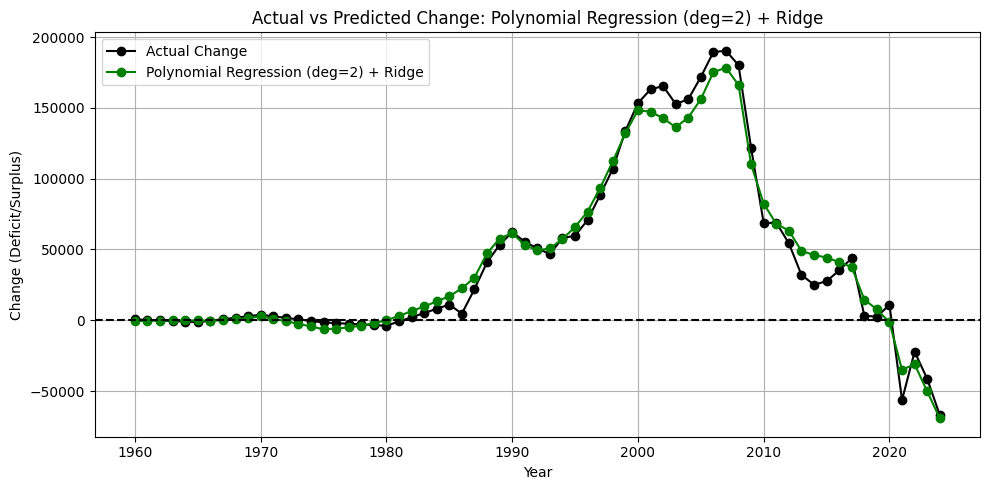

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/Colab Notebooks/Merged_Social_Security.csv"
df = pd.read_csv(file_path)

df = df.sort_values("year").set_index("year")
df = df.reindex(np.arange(df.index.min(), 2025))
df = df.interpolate(method='linear')
df = df.dropna()
df = df.reset_index().rename(columns={"index": "year"})

features = ['Income', 'Cost', 'life_expectancy', 'Workers', 'Beneficiaries']
if 'Unemployment' in df.columns and 'Birth_Rate' in df.columns:
    features += ['Unemployment', 'Birth_Rate']

target = 'Change'
X = df[features].values
y = df[target].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

models = {
    'Ridge Regression': Ridge(alpha=0.05),
    'Polynomial Regression (deg=2) + Ridge': make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=0.05))
}

results = []
predictions = {}

for name, model in models.items():
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    predictions[name] = y_pred
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    results.append((name, rmse, mae, r2))

results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'MAE', 'R2 Score'])
print("\nModel Performance Comparison:")
print(results_df)

colors = ['b', 'g', 'r', 'c', 'm', 'y']

for idx, (name, y_pred) in enumerate(predictions.items()):
    plt.figure(figsize=(10, 5))
    plt.plot(df['year'], y, 'ko-', label='Actual Change')
    plt.plot(df['year'], y_pred, 'o-', color=colors[idx % len(colors)], label=f'{name}')
    plt.title(f'Actual vs Predicted Change: {name}')
    plt.xlabel('Year')
    plt.ylabel('Change (Deficit/Surplus)')
    plt.axhline(0, color='black', linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
